<a href="https://colab.research.google.com/github/oserikov/data-science-nlp/blob/master/%D1%8D%D0%BC%D0%B1%D0%B5%D0%B4%D0%B4%D0%B8%D0%BD%D0%B3%D0%B8_%D0%B2_%D1%81%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/oserikov/data-science-nlp/master/data/rus_stopwords.txt
!wget https://raw.githubusercontent.com/oserikov/data-science-nlp/master/data/polkrug_lem.txt
!wget https://rusvectores.org/static/models/news_upos_cbow_300_2_2017.bin.gz
!gunzip news_upos_cbow_300_2_2017.bin.gz


--2019-10-29 19:41:22--  https://raw.githubusercontent.com/oserikov/data-science-nlp/master/data/rus_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4322 (4.2K) [text/plain]
Saving to: ‘rus_stopwords.txt’

rus_stopwords.txt   100%[===================>]   4.22K  --.-KB/s    in 0s      

2019-10-29 19:41:22 (91.6 MB/s) - ‘rus_stopwords.txt’ saved [4322/4322]

--2019-10-29 19:41:24--  https://raw.githubusercontent.com/oserikov/data-science-nlp/master/data/polkrug_lem.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18267211 (1

In [0]:
!pip install pymorphy2

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 7.1MB 8.5MB/s 


In [0]:
import umap
import pymorphy2
import gensim
import numpy as np
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


processed 0 of 10000
processed 100 of 10000
processed 200 of 10000
processed 300 of 10000
processed 400 of 10000
processed 500 of 10000
processed 600 of 10000
processed 700 of 10000
processed 800 of 10000
processed 900 of 10000
processed 1000 of 10000
processed 1100 of 10000
processed 1200 of 10000
processed 1300 of 10000
processed 1400 of 10000
processed 1500 of 10000
processed 1600 of 10000
processed 1700 of 10000
processed 1800 of 10000
processed 1900 of 10000
processed 2000 of 10000
processed 2100 of 10000
processed 2200 of 10000
processed 2300 of 10000
processed 2400 of 10000
processed 2500 of 10000
processed 2600 of 10000
processed 2700 of 10000
processed 2800 of 10000
processed 2900 of 10000
processed 3000 of 10000
processed 3100 of 10000
processed 3200 of 10000
processed 3300 of 10000
processed 3400 of 10000
processed 3500 of 10000
processed 3600 of 10000
processed 3700 of 10000
processed 3800 of 10000
processed 3900 of 10000
processed 4000 of 10000
processed 4100 of 10000
proc

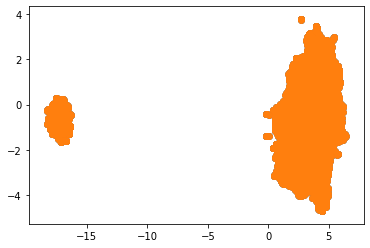

In [0]:

polkrug_texts = [line for line in open('polkrug_lem.txt', 'r', encoding='utf-8')][:10000]
w2v_model = gensim.models.KeyedVectors.load_word2vec_format("news_upos_cbow_300_2_2017.bin", binary=True)


morph_analyzer =  pymorphy2.MorphAnalyzer()
polkrug_texts_vectorized = []
for text_idx, text in enumerate(polkrug_texts):
    text_vs = []
    for word in text.split():
        pos_tag = morph_analyzer.parse(word)[0].tag.POS
        pos_tagged_word = f"{word}_{pos_tag}"
        if word.isalpha() and pos_tagged_word in w2v_model:
            word_v = w2v_model.get_vector(pos_tagged_word)
            # print(f"found {pos_tagged_word}")
            text_vs.append(word_v)
    if text_vs:
        text_v = np.mean(np.array(text_vs), axis=0)
        polkrug_texts_vectorized.append((text, text_v))
    if text_idx % 100 == 0:
        print(f"processed {str(text_idx)} of {str(len(polkrug_texts))}")

print("calculated all the document vectors")

umap_emb = umap.UMAP()
X_2D_umap = umap_emb.fit_transform([e[1] for e in polkrug_texts_vectorized])

for i in range(2):
    plt.scatter(X_2D_umap[i:,0], X_2D_umap[i:,1])